#Project: RAG System based on Influenza publication

## Requirement:
    The RAG system is supposed to utilize LLM to process research queries into highly formatted answers in addition to sources and citation of research papers.

# Build a Contextual Retrieval based RAG System

## Install OpenAI, and LangChain dependencies

In [2]:
!pip install langchain==0.3.4
!pip install langchain-openai==0.2.3
!pip install langchain-community==0.3.3
!pip install jq==1.8.0
!pip install pymupdf==1.24.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.6
    Uninstalling langsmith-0.3.6:
      Successfully uninstalled langsmith-0.3.6
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.17
    Uninstalling langchain-0.3.17:
      Successfully uninstalled langchain-0.3.17
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.6/746.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 70.6 MB/s eta 0:00:00


## Install Chroma Vector DB and LangChain wrapper

In [3]:
!pip install langchain-chroma==0.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:0

In [1]:
!pip install openai==1.55.3 httpx==0.27.2 --force-reinstall --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.6/345.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently

## Enter Open AI API Key

In [2]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Setup Environment Variables

In [3]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

### Open AI Embedding Models

LangChain enables us to access Open AI embedding models which include the newest models: a smaller and highly efficient `text-embedding-3-small` model, and a larger and more powerful `text-embedding-3-large` model.

In this project, we will use small embedding model for cost efficiency sake.

In [4]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

## Loading and Processing the Data

We can load all kinds of dataset including the following:
 - Tabular dataset from SQL database
 - Unstructured datasets from No SQL databases (MongoDB, Cassandra etc)
 - Wiki and Json files
 - Office documents - Word, Powerpoint
 - PDF files.

In this project we restrict the documents to PDFs only.
We can use **unstructured.io** (An open source document processing to load all kinds of data formats)

### Get the dataset

In [5]:
from glob import glob

pdf_files = glob('./infection_studies/*.pdf')
pdf_files

['./infection_studies/Augusta_From_RNA.pdf',
 './infection_studies/Integrative_computational_approach.pdf',
 './infection_studies/COMO_pipeline_for_multiomics.pdf',
 './infection_studies/A_multiscale_mechanistic_model_dendritic_model.pdf',
 './infection_studies/A_multiapproach_multiscale_platform_to_model_CD4.pdf',
 './infection_studies/CSB_lecture_flux_balance_analysis.pdf',
 './infection_studies/A_mechanistic_computation_approach.pdf']

### Create Chunk Contexts for Contextual Retrieval

 - Prepare chunk specific explanatory context to each chunk before creating the vector DB embeddings and TF-DF vectors
 - This helps in having keywords phrases in eah chunk based on its relevant to the overall document


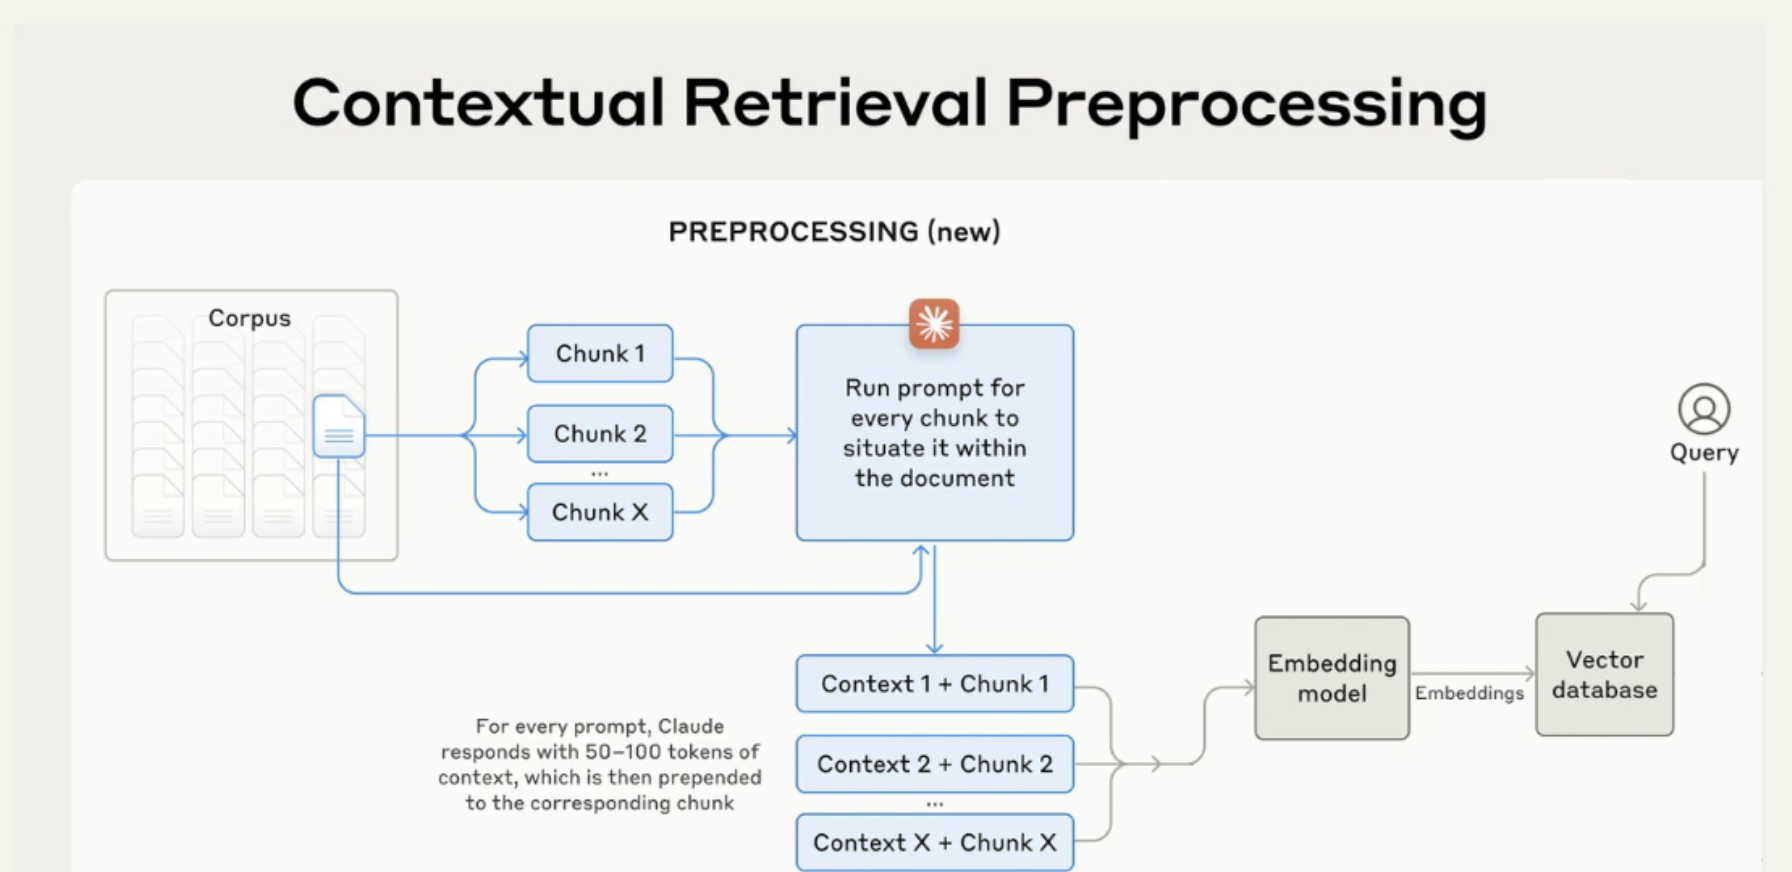

In [6]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

In [7]:
# create chunk context generation chain
from langchain.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser


def generate_chunk_context(document, chunk):

    chunk_process_prompt = """You are an AI assistant specializing in research paper analysis.
                            Your task is to provide brief, relevant context for a chunk of text
                            based on the following research paper.

                            Here is the research paper:
                            <paper>
                            {paper}
                            </paper>

                            Here is the chunk we want to situate within the whole document:
                            <chunk>
                            {chunk}
                            </chunk>

                            Provide a concise context (3-4 sentences max) for this chunk,
                            considering the following guidelines:

                            - Give a short succinct context to situate this chunk within the overall document
                            for the purposes of improving search retrieval of the chunk.
                            - Answer only with the succinct context and nothing else.
                            - Context should be mentioned like 'Focuses on ....'
                            do not mention 'this chunk or section focuses on...'

                            Context:
                        """

    prompt_template = ChatPromptTemplate.from_template(chunk_process_prompt)

    agentic_chunk_chain = (prompt_template
                                |
                            chatgpt
                                |
                            StrOutputParser())

    context = agentic_chunk_chain.invoke({'paper': document, 'chunk': chunk})

    return context

In [8]:
from langchain.docstore.document import Document

In [9]:
from langchain.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import uuid

def create_contextual_chunks(file_path, chunk_size=3500, chunk_overlap=0):

    print('Loading pages:', file_path)
    loader = PyMuPDFLoader(file_path)
    doc_pages = loader.load()

    print('Chunking pages:', file_path)
    splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                              chunk_overlap=chunk_overlap)
    doc_chunks = splitter.split_documents(doc_pages)

    print('Generating contextual chunks:', file_path)
    original_doc = '\n'.join([doc.page_content for doc in doc_chunks])
    contextual_chunks = []
    for chunk in doc_chunks:
        chunk_content = chunk.page_content
        chunk_metadata = chunk.metadata
        chunk_metadata_upd = {
            'id': str(uuid.uuid4()),
            'page': chunk_metadata['page'],
            'source': chunk_metadata['source'],
            'title': chunk_metadata['source'].split('/')[-1]
        }
        context = generate_chunk_context(original_doc, chunk_content)
        contextual_chunks.append(Document(page_content=context+'\n'+chunk_content,
                                          metadata=chunk_metadata_upd))
    print('Finished processing:', file_path)
    print()
    return contextual_chunks

In [10]:
paper_docs = []
for fp in pdf_files:
    paper_docs.extend(create_contextual_chunks(file_path=fp, chunk_size=3500))

Loading pages: ./infection_studies/Augusta_From_RNA.pdf
Chunking pages: ./infection_studies/Augusta_From_RNA.pdf
Generating contextual chunks: ./infection_studies/Augusta_From_RNA.pdf
Finished processing: ./infection_studies/Augusta_From_RNA.pdf

Loading pages: ./infection_studies/Integrative_computational_approach.pdf
Chunking pages: ./infection_studies/Integrative_computational_approach.pdf
Generating contextual chunks: ./infection_studies/Integrative_computational_approach.pdf
Finished processing: ./infection_studies/Integrative_computational_approach.pdf

Loading pages: ./infection_studies/COMO_pipeline_for_multiomics.pdf
Chunking pages: ./infection_studies/COMO_pipeline_for_multiomics.pdf
Generating contextual chunks: ./infection_studies/COMO_pipeline_for_multiomics.pdf
Finished processing: ./infection_studies/COMO_pipeline_for_multiomics.pdf

Loading pages: ./infection_studies/A_multiscale_mechanistic_model_dendritic_model.pdf
Chunking pages: ./infection_studies/A_multiscale_mech

In [11]:
len(paper_docs)

211

In [12]:
paper_docs[0]

Document(metadata={'id': 'fd22b21d-0b86-4ddb-a093-7cefd3bca804', 'page': 0, 'source': './infection_studies/Augusta_From_RNA.pdf', 'title': 'Augusta_From_RNA.pdf'}, page_content='Focuses on the introduction and overview of the Augusta package, an open-source Python tool designed for inferring Gene Regulatory Networks (GRNs) and Boolean Networks (BNs) from high-throughput gene expression data. It highlights the significance of computational models in understanding gene regulatory mechanisms and addresses the limitations of existing tools for genome-wide analysis, particularly for non-model organisms. The section also outlines the unique approach of Augusta in refining GRNs through transcription factor binding motif prediction and database integration.\nComputational and Structural Biotechnology Journal 23 (2024) 783–790\nAvailable online 20 January 2024\n2001-0370/© 2024 The Authors. Published by Elsevier B.V. on behalf of Research Network of Computational and Structural Biotechnology. T

## Index Document Chunks and Embeddings in Vector DB

Here we initialize a connection to a Chroma vector DB client, and also we want to save to disk, so we simply initialize the Chroma client and pass the directory where we want the data to be saved to.

In [13]:
from langchain_chroma import Chroma

# create vector DB of docs and embeddings -
chroma_db = Chroma.from_documents(documents=paper_docs,
                                  collection_name='my_context_db',
                                  embedding=openai_embed_model,
                                  collection_metadata={"hnsw:space": "cosine"},
                                  persist_directory="./my_context_db")

### Load Vector DB from disk

This is just to show once you have a vector database on disk you can just load and create a connection to it anytime

In [14]:
# load from disk
chroma_db = Chroma(persist_directory="./my_context_db",
                   collection_name='my_context_db',
                   embedding_function=openai_embed_model)

In [ ]:
chroma_db

### Semantic Similarity based Retrieval

We use simple cosine similarity here and retrieve the top 5 similar documents based on the user input query

In [15]:
similarity_retriever = chroma_db.as_retriever(search_type="similarity",
                                              search_kwargs={"k": 5})

In [16]:
from IPython.display import display, Markdown

def display_docs(docs):
    for doc in docs:
        print('Metadata:', doc.metadata)
        print('Content Brief:')
        display(Markdown(doc.page_content[:1000]))
        print()

In [21]:
query = "Explain CD4+ T cell differentiation?"
top_docs = similarity_retriever.invoke(query)
display_docs(top_docs)

Metadata: {'id': '1503ea37-cee3-449b-8f69-623a07ff944d', 'page': 1, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the classification and functional roles of various CD4+ T cell subtypes, including Th1, Th2, iTregs, Th17, Th9, and Tfh cells, as well as the mechanisms of plasticity and differentiation influenced by cytokine signaling. It highlights the complexity of T cell responses and the potential for phenotypic switching among these subtypes in the context of immune regulation.
Puniya et al.
Cytokine Mediated Regulation of T cell Differentiation
INTRODUCTION
The diversity and number of immunity-related diseases require a
high level of heterogeneity in the immune system to maintain the
overall well-being of a human. Early studies of immune responses
led to a discovery that the CD4+ T cells (referred to as T cells),
which are critical players in immunity, can be classiﬁed into
two subtypes - T helper 1 (Th1) and T helper 2 (Th2) cells
(Mosmann et al., 1986). Each type of eﬀector T cell produces a
speciﬁc set of cytokines that deﬁne the function of the cell and
the way it further governs


Metadata: {'id': 'b20e7749-5540-4e32-924c-0f246e3a766d', 'page': 21, 'source': './infection_studies/A_multiapproach_multiscale_platform_to_model_CD4.pdf', 'title': 'A_multiapproach_multiscale_platform_to_model_CD4.pdf'}
Content Brief:


Covers the acknowledgments and author contributions for the research article, detailing the roles of various contributors in the study, including conceptualization, data curation, formal analysis, and methodology. It also includes references to prior works that informed the research on CD4+ T cell differentiation and immune responses.
plots, and the results of sensitivity studies. Tables summarize all model variables and
parameters, results of sensitivity studies, and a summary of the experimental results used for
validation.
(DOCX)
Acknowledgments
The authors thank aSciStance Ltd. for their scientific advice and editing services.
Author Contributions
Conceptualization: Toma´sˇ Helikar.
Data curation: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Toma´sˇ Helikar.
Formal analysis: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Matteo Barberis, Toma´sˇ
Helikar.
Funding acquisition: Toma´sˇ Helikar.
Investigation: Kenneth Y. Wertheim, Matteo Barberis, Toma´sˇ Helikar.
Methodology: Kenneth Y. Werthei


Metadata: {'id': '2c9c3f54-7cdc-4de6-a4bd-c2ed6338f243', 'page': 9, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the influence of cytokine activity, specifically IL-12, IL-27, and IL-18, on the differentiation of CD4+ T cells into Th1 and Th2 phenotypes. It discusses how varying levels of these cytokines can shift the balance between Th1 and Th2 responses, contributing to the understanding of T cell plasticity and the regulatory mechanisms involved in immune responses. The discussion elaborates on the construction of a mechanistic computational model to analyze these dynamics.
ligand or increased activity of IL-12 and IL-27 can drive the Th1–
Th2 phenotype toward Th1 by increasing the activity of Tbet
and decreasing the activity of GATA3. In contrast, the increased
activity of IL-18 can drive Th1–Th2 phenotypes toward Th2.
DISCUSSION
In this study, we sought to investigate the cellular phenotypes as a
result of CD4+ T cell diﬀerentiation under diverse environmental
conditions and understand how the balance between complex
phenotypes is regulated. To achieve this, by manually curating
l


Metadata: {'id': '703b391d-2e56-4a9d-8781-117141bd3359', 'page': 3, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the network diagram of the logical model that illustrates the signal transduction pathways regulating CD4+ T cell differentiation into major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). It details the components of the model, including lineage-specifying transcription factors and extracellular signals, while summarizing the predicted canonical and complex phenotypes resulting from various input compositions.
Puniya et al.
Cytokine Mediated Regulation of T cell Differentiation
FIGURE 1 | Network diagram of the logical model of signal transduction in CD4+ T cells. The modeled pathways reﬂect the canonical pathways known to regulate
T cell differentiation into the major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). The model includes 38 components, including four
lineage-specifying TFs (Tbet, GATA3, RORγt, and Foxp3) and nine extracellular components: TCR-ligand, IFN-γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27.
Green a


Metadata: {'id': 'dc56815d-c5f7-440e-815f-f0cc083a77a9', 'page': 2, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the results of a mechanistic, logic-based model of T cell differentiation, detailing the identification of four canonical T cell phenotypes (Th0, Th1, Th2, and iTreg) and six complex phenotypes characterized by co-expression of lineage-specifying transcription factors. It highlights the role of input dosage in regulating the balance of specific T cell types within these complex phenotypes, providing insights into the effects of environmental input composition on T cell differentiation.
Puniya et al.
Cytokine Mediated Regulation of T cell Differentiation
well as novel cellular phenotypes. These include four canonical
phenotypes of diﬀerentiated T cells (Th0, Th1, Th2, and iTreg)
as well as six complex phenotypes, whereby multiple lineage-
specifying TFs are co-expressed. Our results also suggest that the
input dosage regulates the balance of speciﬁc T cells within the
complex T cell phenotypes, providing new insights into speciﬁc
patterns of environmental input composition an

## Build the RAG Pipeline

In [18]:
from langchain_core.prompts import ChatPromptTemplate

rag_prompt = """You are an assistant who is an expert in question-answering tasks.
                Answer the following question using only the following pieces of retrieved context.
                If the answer is not in the context, do not make up answers, just say that you don't know.
                Keep the answer detailed and well formatted based on the information from the context.

                Question:
                {question}

                Context:
                {context}

                Answer:
            """

rag_prompt_template = ChatPromptTemplate.from_template(rag_prompt)

In [19]:
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

qa_rag_chain = (
    {
        "context": (similarity_retriever
                      |
                    format_docs),
        "question": RunnablePassthrough()
    }
      |
    rag_prompt_template
      |
    chatgpt
)

In [20]:
from IPython.display import display, Markdown

query = "How are CD4+ T cell differentiation regulated?"
result = qa_rag_chain.invoke(query)
display(Markdown(result.content))

CD4+ T cell differentiation is regulated through a complex interplay of cytokine signaling, transcription factors, and various signaling pathways. Here are the key points regarding the regulation of CD4+ T cell differentiation:

1. **Cytokine Influence**: The differentiation of naive CD4+ T cells into various subtypes, such as Th1, Th2, Th17, and inducible regulatory T cells (iTregs), is heavily influenced by the presence and concentration of specific cytokines. For instance:
   - **IL-12, IL-27, and IL-18** play crucial roles in promoting Th1 differentiation, while **IL-4** is essential for Th2 differentiation.
   - The balance between Th1 and Th2 responses can be shifted by varying levels of these cytokines, demonstrating the plasticity of T cell responses.

2. **Transcription Factors**: The differentiation process is also governed by lineage-specifying transcription factors (TFs):
   - **Tbet** is associated with Th1 cells, **GATA3** with Th2 cells, **RORγt** with Th17 cells, and **Foxp3** with iTregs. The activation of these TFs is influenced by the cytokine environment.
   - For example, increased IL-12 can enhance Tbet activity while suppressing GATA3, thus favoring Th1 differentiation over Th2.

3. **Signaling Pathways**: The differentiation process involves multiple, mutually cross-linked signaling pathways, including the JAK/STAT pathways. These pathways are activated by cytokine receptors upon binding their respective cytokines, leading to the activation of specific transcription factors that drive differentiation.

4. **Phenotypic Plasticity**: Recent studies have shown that some T helper cells can switch phenotypes based on the combination of signals they receive. For instance, iTregs and Th17 cells can switch from one phenotype to another in response to cytokines like IL-6. This plasticity allows for a dynamic immune response tailored to the specific context of the immune challenge.

5. **Complex Phenotypes**: The model of CD4+ T cell differentiation also predicts the existence of complex phenotypes, such as Th1–Th2 and Th1–Th17 hybrid cells, which can arise from the co-expression of transcription factors and the influence of various cytokine combinations.

6. **Computational Modeling**: A mechanistic computational model has been developed to analyze these dynamics, incorporating 38 components, including cytokines and transcription factors, to simulate the regulatory networks involved in T cell differentiation.

In summary, CD4+ T cell differentiation is a highly regulated process influenced by cytokine signaling, transcription factor activity, and the ability of T cells to exhibit phenotypic plasticity in response to their environment.

# Stage 2: RAG System with Sources

  - LLM (GPT-4o) processes [user query + RAG proompt + context docs] to generate Answers + Sources


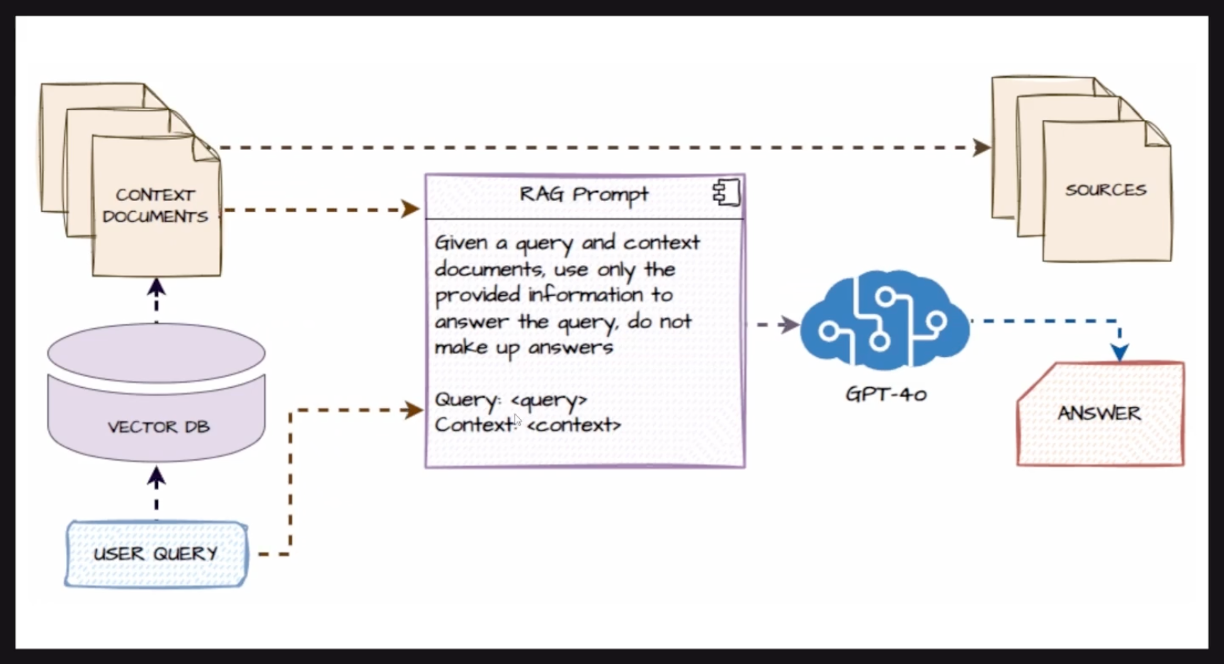

In [22]:
from langchain_core.prompts import ChatPromptTemplate

rag_prompt = """You are an assistant who is an expert in question-answering tasks.
                Answer the following question using only the following pieces of retrieved context.
                If the answer is not in the context, do not make up answers, just say that you don't know.
                Keep the answer detailed and well formatted based on the information from the context.

                Question:
                {question}

                Context:
                {context}

                Answer:
            """

rag_prompt_template = ChatPromptTemplate.from_template(rag_prompt)

In [23]:
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.runnables import RunnableLambda
from operator import itemgetter


chatgpt = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

src_rag_response_chain = (
    {
        "context": (itemgetter('context')
                        |
                    RunnableLambda(format_docs)),
        "question": itemgetter("question")
    }
        |
    rag_prompt_template
        |
    chatgpt
        |
    StrOutputParser()
)

rag_chain_w_sources = (
    {
        "context": similarity_retriever,
        "question": RunnablePassthrough()
    }
        |
    RunnablePassthrough.assign(response=src_rag_response_chain)
)

In [24]:
#query = "How are CD4+ T cell differentiation regulated?"
#result = rag_chain_w_sources.invoke(query)
#result

In [25]:
from IPython.display import display, Markdown

def display_results(result_obj):
    print('Query:')
    display(Markdown(result_obj['question']))
    print()
    print('Response:')
    display(Markdown(result_obj['response']))
    print('='*50)
    print('Sources:')
    for source in result_obj['context']:
        print('Metadata:', source.metadata)
        print('Content Brief:')
        display(Markdown(source.page_content))
        print()


In [26]:
query = "How are CD4+ T cell differentiation regulated?"
result = rag_chain_w_sources.invoke(query)
display_results(result)

Query:


How are CD4+ T cell differentiation regulated?


Response:


CD4+ T cell differentiation is regulated through a complex interplay of cytokine signaling, transcription factors, and various signaling pathways. Here are the key points regarding the regulation of CD4+ T cell differentiation:

1. **Cytokine Influence**: The differentiation of naive CD4+ T cells into various subtypes, such as Th1, Th2, Th17, and inducible regulatory T cells (iTregs), is heavily influenced by the presence and concentration of specific cytokines. For instance:
   - **IL-12, IL-27, and IL-18** play crucial roles in promoting Th1 differentiation, while **IL-4** is essential for Th2 differentiation.
   - The balance between Th1 and Th2 responses can be shifted by varying levels of these cytokines, demonstrating the plasticity of T cell responses.

2. **Transcription Factors**: The differentiation process is also governed by lineage-specifying transcription factors:
   - **Tbet** is associated with Th1 cells, **GATA3** with Th2 cells, **RORγt** with Th17 cells, and **Foxp3** with iTregs. The activation of these transcription factors is influenced by the cytokine environment.
   - For example, increased IL-12 can enhance Tbet activity while suppressing GATA3, thus favoring Th1 differentiation over Th2.

3. **Signaling Pathways**: The differentiation process involves multiple, mutually cross-linked signaling pathways, including the JAK/STAT pathways. These pathways are activated by cytokine receptors and lead to the expression of specific transcription factors that dictate the T cell fate.

4. **Phenotypic Plasticity**: Recent studies have shown that some T helper cells can switch phenotypes based on the combination of signals they receive. For instance, iTregs and Th17 cells can switch from one phenotype to another in response to cytokines like IL-6. This plasticity allows for a dynamic immune response tailored to the specific context of the immune challenge.

5. **Complex Phenotypes**: The model of CD4+ T cell differentiation also predicts the existence of complex phenotypes, such as Th1–Th2 and Th1–Th17 hybrids, which can arise from the co-expression of transcription factors and the influence of various cytokine combinations.

6. **Computational Modeling**: A mechanistic computational model has been developed to analyze these dynamics, incorporating 38 components, including transcription factors and cytokines, to simulate how different input compositions can lead to various T cell outputs.

In summary, CD4+ T cell differentiation is a highly regulated process influenced by cytokine signaling, transcription factor activity, and the ability of T cells to exhibit phenotypic plasticity in response to their environment. Understanding these regulatory mechanisms is crucial for developing strategies for immunotherapy and managing immune-related diseases.

Sources:
Metadata: {'id': '1503ea37-cee3-449b-8f69-623a07ff944d', 'page': 1, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the classification and functional roles of various CD4+ T cell subtypes, including Th1, Th2, iTregs, Th17, Th9, and Tfh cells, as well as the mechanisms of plasticity and differentiation influenced by cytokine signaling. It highlights the complexity of T cell responses and the potential for phenotypic switching among these subtypes in the context of immune regulation.
Puniya et al.
Cytokine Mediated Regulation of T cell Differentiation
INTRODUCTION
The diversity and number of immunity-related diseases require a
high level of heterogeneity in the immune system to maintain the
overall well-being of a human. Early studies of immune responses
led to a discovery that the CD4+ T cells (referred to as T cells),
which are critical players in immunity, can be classiﬁed into
two subtypes - T helper 1 (Th1) and T helper 2 (Th2) cells
(Mosmann et al., 1986). Each type of eﬀector T cell produces a
speciﬁc set of cytokines that deﬁne the function of the cell and
the way it further governs the immune response. Speciﬁcally,
the Th1 cells are responsible for several autoimmune diseases,
whereas the Th2 cells are the mediators in cases of allergy and
asthma (Reiner, 2007; Zhu and Paul, 2008). More recently, a
number of additional T cell subtypes, including the inducible
regulatory T cells (iTregs) (Groux et al., 1997; Chen et al., 2003;
Schmitt and Williams, 2013), T helper 17 (Th17) (Romagnani,
2000; Harrington et al., 2005; Mangan et al., 2006), T helper 9
(Th9) (Dardalhon et al., 2008; Veldhoen et al., 2008; Soroosh
and Doherty, 2009), and follicular T helper cells (Tfh) (Breitfeld
et al., 2000; Schaerli et al., 2000) have been discovered, and their
functions have been extensively studied. For example, the Th17
cells have been found to be responsible for assisting the immune
response against extracellular bacteria and fungi, whereas the
main role of the iTregs is to maintain the balance and regulate
immune responses by the T helper cell subtypes (Zhu and Paul,
2008). The Th9 cells have been found to be involved in pathogen
immunity and inﬂammatory diseases (Kaplan, 2013). Finally, the
Tfh cells assist in T cell-dependent B cell response (Breitfeld et al.,
2000; Schaerli et al., 2000; Ma et al., 2012).
In addition, recent studies suggest that some T helper cells
are capable of switching and exhibiting phenotypes of one of
the alternative eﬀector T cells, depending on the combination of
input signals that the cell receives. For example, the iTregs and
Th17 can switch from one phenotype to the other in response to
the pleiotropic cytokine interleukin-6 (IL-6) (Xu et al., 2007; Lee
et al., 2009a; Rowell and Wilson, 2009; Kimura and Kishimoto,
2010). The fully diﬀerentiated Th17 cells have been observed to
produce Th1-cell-speciﬁc cytokines (Shi et al., 2008; Lee et al.,
2009b; Nindl et al., 2012; Harbour et al., 2015). The Th2 cells have
been reported to further develop into Th9 cells (Veldhoen et al.,
2008). More complexity in T cell diﬀerentiation was observed
in the form of co-expression of mutually exclusive lineage-
specifying transcription factors (TFs) (Peine et al., 2013; Bock
et al., 2017). This co-expression can lead to the development
of stable or intermediate subtypes that share characteristics of
more than one type of T cell (Tartar et al., 2010). Examples of
such mixed (complex) phenotypes include Th1–Th2 (Peine et al.,
2013; Bock et al., 2017) and Th1–Th17 (Kullberg et al., 2006;
Morrison et al., 2013).
The diﬀerentiation process is governed by the regulation of
multiple, mutually cross-linked signaling pathways, which form
complex networks (Zhu et al., 2010). The stimulation of the
naive CD4+ T cells by various cytokines triggers a cascade
of signaling events, such as the activation of the JAK/STAT
pathways that lead to the activation of T cell lineage-specifying


Metadata: {'id': '703b391d-2e56-4a9d-8781-117141bd3359', 'page': 3, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the network diagram of the logical model that illustrates the signal transduction pathways regulating CD4+ T cell differentiation into major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). It details the components of the model, including lineage-specifying transcription factors and extracellular signals, while summarizing the predicted canonical and complex phenotypes resulting from various input compositions.
Puniya et al.
Cytokine Mediated Regulation of T cell Differentiation
FIGURE 1 | Network diagram of the logical model of signal transduction in CD4+ T cells. The modeled pathways reﬂect the canonical pathways known to regulate
T cell differentiation into the major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). The model includes 38 components, including four
lineage-specifying TFs (Tbet, GATA3, RORγt, and Foxp3) and nine extracellular components: TCR-ligand, IFN-γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27.
Green arrows represent activation, red arrows represent inhibition, and gray arrows represent the conditions associated with activatory or inhibitory interactions.
IFNg_e, interferon-γ (external); IL12, interleukin 12; IL18, interleukin 18; IL23, interleukin 23; IL27, interleukin 27; IL4_e, interleukin 4 (external); IL6_e, interleukin 6
(external); TCR, T cell receptor; TGFb, transforming growth factor-β; Foxp3, Forkhead box P3; GATA3, GATA-binding protein 3; IFNg, interferon-γ; IFNgR,
interferon-γ receptor (generic); IL12R, interleukin 12 receptor (generic); IL17, interleukin 17; IL18R, interleukin 18 receptor 1; IL2, interleukin 2; IL21, interleukin 21;
IL21R, interleukin 21 receptor; IL23R, interleukin 23 receptor; IL2R, interleukin 2 receptor; IL4, interleukin 4; IL4R, interleukin 4 receptor; IL6, interleukin 6; IL6R,
interleukin 6 receptor; IRAK, interleukin-1 receptor associated kinase 1; Jak1, Janus kinase 1; NFAT, nuclear factor of activated T cells 5, tonicity-responsive; NF-κB,
nuclear factor of kappa light polypeptide gene enhancer in B cells (generic); RORgt, RAR-related orphan receptor C; SOCS1, suppressor of cytokine signaling 1;
STAT1, signal transducer and activator 1; STAT3, signal transducer and activator 3; STAT4, signal transducer and activator 4; STAT5, signal transducer and activator
5; STAT6, signal transducer and activator 6; Tbet, T-box expressed in T cells; TGFbR, transforming growth factor-β receptor (generic).
present (Th0 phenotype). Most of the outputs that represent
the Th0 phenotype (>95%) were stimulated by the input
compositions with an inactive TCR ligand. The remaining Th0-
leading input compositions contained an active TCR ligand
along with IL-23, or IL-18, or IL-6. This corresponds to
the experimentally established scenarios, whereby the T cells
cannot diﬀerentiate in the absence of TCR activation or in
the absence of key lineage-speciﬁc cytokines (Podojil and
Miller, 2009; Zhu et al., 2010; Chen and Flies, 2013). Fifty-
two input compositions led to 16 outputs with active Tbet,
representing the Th1 phenotype. A total of 24 input compositions
produce 10 outputs with active GATA3, representing the Th2
phenotype, while four input compositions led to one output
with active Foxp3, representing the iTreg phenotype. We
did not observe distinct outputs with only RORγt active;
instead, RORγt was part of the complex phenotypes (discussed
below).
In addition to the four canonical phenotypes, the model
predicted six complex phenotypes. The number of input
compositions, and the number of outputs that represent each
complex phenotype, is summarized in Figure 3C. Of the six
complex phenotypes, three of them including Th1–Th2 (Hegazy
et al., 2010; Evans and Jenner, 2013; Peine et al., 2013),
Th1–iTreg (Koch et al., 2009), and Th17–iTreg (Eisenstein
and Williams, 2009) were experimentally observed earlier, thus
further validating the model. The model also predicted three


Metadata: {'id': '2c9c3f54-7cdc-4de6-a4bd-c2ed6338f243', 'page': 9, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the influence of cytokine activity, specifically IL-12, IL-27, and IL-18, on the differentiation of CD4+ T cells into Th1 and Th2 phenotypes. It discusses how varying levels of these cytokines can shift the balance between Th1 and Th2 responses, contributing to the understanding of T cell plasticity and the regulatory mechanisms involved in immune responses. The discussion elaborates on the construction of a mechanistic computational model to analyze these dynamics.
ligand or increased activity of IL-12 and IL-27 can drive the Th1–
Th2 phenotype toward Th1 by increasing the activity of Tbet
and decreasing the activity of GATA3. In contrast, the increased
activity of IL-18 can drive Th1–Th2 phenotypes toward Th2.
DISCUSSION
In this study, we sought to investigate the cellular phenotypes as a
result of CD4+ T cell diﬀerentiation under diverse environmental
conditions and understand how the balance between complex
phenotypes is regulated. To achieve this, by manually curating
literature data, we constructed a mechanistic computational
(logical) model of signal transduction that regulates the
diﬀerentiation of naive T cells into Th1, Th2, Th17, and iTreg
cells. The components (i.e., proteins and genes) in a logical
model can have binary (0 or 1) states at any time t. The state of
the network evolves stepwise based on the logical rules deﬁned
for each model component (Helikar and Rogers, 2009; Helikar
et al., 2012a,b, 2013; Naldi et al., 2015; Abou-Jaoudé et al., 2016;
Barberis and Verbruggen, 2017; Linke et al., 2017).
Frontiers in Physiology | www.frontiersin.org
10
August 2018 | Volume 9 | Article 878


Metadata: {'id': '27b7fc3b-accc-4c63-9d1d-73b36a26bcbd', 'page': 15, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on various studies that contribute to the understanding of CD4+ T cell differentiation and plasticity, highlighting the roles of specific cytokines and transcription factors in shaping T cell responses. It references key research articles that explore the mechanisms of Th1 and Th2 cell differentiation, hybrid cell phenotypes, and the regulatory networks involved in T cell function.
Becskei, A., and Grusby, M. J. (2007). Contribution of IL-12R mediated feedback
loop to Th1 cell diﬀerentiation. FEBS Lett. 581, 5199–5206. doi: 10.1016/j.
febslet.2007.10.007
Bock, C. N., Babu, S., Breloer, M., Rajamanickam, A., Boothra, Y., Brunn, M.-L.,
et al. (2017). Th2/1 hybrid cells occurring in murine and human strongyloidiasis
share eﬀector functions of Th1 cells. Front. Cell. Infect. Microbiol. 7:261. doi:
10.3389/fcimb.2017.00261
Breitfeld, D., Ohl, L., Kremmer, E., Ellwart, J., Sallusto, F., Lipp, M., et al. (2000).
Follicular B helper T cells express CXC chemokine receptor 5, localize to
B cell follicles, and support immunoglobulin production. J. Exp. Med. 192,
1545–1552. doi: 10.1084/jem.192.11.1545
Carbo, A., Hontecillas, R., Kronsteiner, B., Viladomiu, M., Pedragosa, M., Lu, P.,
et al. (2013). Systems modeling of molecular mechanisms controlling cytokine-
driven CD4 + T cell diﬀerentiation and phenotype plasticity. PLoS Comput.
Biol. 9:e1003027. doi: 10.1371/journal.pcbi.1003027
Carbo, A., Olivares-Villagómez, D., Hontecillas, R., Bassaganya-Riera, J.,
Chaturvedi, R., Blanca Piazuelo, M., et al. (2014). Systems modeling of the role
of interleukin-21 in the maintenance of eﬀector CD4 + T cell responses during
chronic Helicobacter pylori infection. mBio 5, 1–11. doi: 10.1128/mBio.01243-
14
Chaouiya, C., Bérenguier, D., Keating, S. M., Naldi, A., van Iersel, M. P.,
Rodriguez, N., et al. (2013). SBML qualitative models: a model representation
format and infrastructure to foster interactions between qualitative modelling
formalisms and tools. BMC Syst. Biol. 7:135. doi: 10.1186/1752-0509-7-135
Chen, L., and Flies, D. B. (2013). Molecular mechanisms of T cell co-stimulation
and co-inhibition. Nat. Rev. Immunol. 13, 227–242. doi: 10.1038/nri3405
Chen, W., Jin, W., Hardegen, N., Lei, K., Li, L., Marinos, N., et al. (2003).
Conversion of peripheral CD4+CD25−naive T cells to CD4+CD25+regulatory
T cells by TGF-β induction of transcription factor Foxp3. J. Exp. Med. 198,
1875–1886. doi: 10.1084/jem.20030152
Chen, Z., Ding, J., Pang, N., Du, R., and Meng, W. (2013). The Th17/Treg balance
and the expression of related cytokines in Uygur cervical cancer patients. Diagn.
Pathol. 8:61. doi: 10.1186/1746-1596-8-61
Dardalhon, V., Awasthi, A., Kwon, H., Galileos, G., Gao, W., Sobel, R. A., et al.
(2008). IL-4 inhibits TGF-beta-induced Foxp3+ T cells and, together with
TGF-beta, generates IL-9+IL-10+ Foxp3(-) eﬀector T cells. Nat. Immunol. 9,
1347–1355. doi: 10.1038/ni.1677
Duan, M.-C., Han, W., Jin, P.-W., Wei, Y.-P., Wei, Q., Zhang, L.-M., et al. (2015).
Disturbed Th17/Treg balance in patients with non-small cell lung cancer.
Inﬂammation 38, 2156–2165. doi: 10.1007/s10753-015-0198-x
Eisenstein, E. M., and Williams, C. B. (2009). The Treg/Th17 cell balance: a new
paradigm for autoimmunity. Pediatr. Res. 65, 26R–31R. doi: 10.1203/PDR.
0b013e31819e76c7
Eizenberg-Magar, I., Rimer, J., Zaretsky, I., Lara-Astiaso, D., Reich-Zeliger, S., and
Friedman, N. (2017). Diverse continuum of CD4+ T cell states is determined by
hierarchical additive integration of cytokine signals. Proc. Natl. Acad. Sci. U.S.A.
114, E6447–E6456. doi: 10.1073/pnas.1615590114
Evans, C. M., and Jenner, R. G. (2013). Transcription factor interplay in t helper cell
diﬀerentiation. Brief. Funct. Genomics 12, 499–511. doi: 10.1093/bfgp/elt025
Fang, D., and Zhu, J. (2017). Dynamic balance between master transcription factors


Metadata: {'id': '50e512ae-5375-4ef7-8669-170ad2e281cd', 'page': 13, 'source': './infection_studies/A_mechanistic_computation_approach.pdf', 'title': 'A_mechanistic_computation_approach.pdf'}
Content Brief:


Focuses on the effects of IL-12 on GATA3 activity in CD4+ T cell differentiation, highlighting the dual role of IL-12 in up-regulating IL-18R and activating NF-κB, which influences GATA3 levels. It emphasizes the importance of understanding cytokine dosage and timing in T cell responses and discusses the implications for immunotherapy strategies. Additionally, it introduces the model construction for analyzing T cell differentiation pathways.
Puniya et al.
Cytokine Mediated Regulation of T cell Differentiation
2012). Interestingly, our results showed an increase as well as
a decrease in the activity levels of GATA3 depending on the
activity levels of IL-12. This can be achieved as a result of IL-
12 up-regulating IL-18R, which induces NF-κB-mediated GATA3
activation. On the other hand, a higher activity of IL-12 results
in a strong Tbet activation, which in turn suppresses GATA3.
Although the predicted activity levels are dimensionless and
semi-quantitative, they provide a starting point for calibrations
against ligand concentrations in speciﬁc experimental research
protocols.
In summary, results provided in this study can provide a
platform to generate and design testable hypotheses in the context
of T cell diﬀerentiation in response to various combinations and
dosage of environmental signals. Furthermore, the presented
results and the mechanistic model can be used as tools to further
investigate the speciﬁc pathway mechanisms that govern each
complex phenotype. Input availability and relative dosage at
which inputs generate a productive signaling cascade necessarily
result in a variable timing of an immune response. Speciﬁcally, we
and others propose that dosage- and timing-dependent impact
of inputs, such as ILs, may impact the T cell diﬀerentiation
(Barberis et al., 2018; Martinez-Sanchez et al., 2018). This may
be investigated by employing experimental methodologies that
we have recently envisioned (Barberis and Verbruggen, 2017).
Furthermore, crosstalk between ILs and signaling cascades,
such as the one governing the cell cycle, may impinge on
a timely T cell-mediated protective response (Barberis et al.,
2018). These aspects are the focus of our current research
eﬀorts. Together with new model-based predictions, improving
the understanding of the detailed mechanisms underlying
T cell diﬀerentiation, can be helpful to design strategies for
immunotherapy against pathogens and various diseases of the
immune system.
MATERIALS AND METHODS
Model Construction
The computational model is a mechanistic, logic-based model
of signal transduction processes known to regulate CD4+ T cell
diﬀerentiation into Th1, Th2, Th17, and iTreg cells. Each
component of the model can assume an active (1) or inactive
(0) state at any time t. The activity state of the model’s internal
components is determined by the regulatory mechanisms of other
directly interacting components. These regulatory mechanisms
are described with Boolean functions (Samaga and Klamt, 2013;
Albert and Thakar, 2014; Le Novère, 2015; Naldi et al., 2015;
Abou-Jaoudé et al., 2016; Linke et al., 2017).
The new signal transduction model was constructed manually
by curating published regulatory mechanisms of each signal
transduction component. Each of the 38 components in the
model corresponds to a signaling molecule (mainly proteins).
The model also contains nine external components that represent
the extracellular environment, consisting of eight cytokines (IFN-
γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27) and a
generic TCR ligand. The ﬁnal model consists of 38 components
(29 internal and 9 external) connected with 96 interactions.
The model is fully annotated with published evidence for
each component and interaction to ensure transparency and
reproducibility. The model is available via the web-based
modeling and analysis platform Cell Collective (Helikar et al.,

# Stage 3: RAG System with Source Citations Agentic Pipeline

- LLM (GPT-4o) processes [user query + RAG proompt + context docs] to generate Answers
- LLM with Tool Calling (GPT-4o) processes [user query + context docs + Answers + citation prompt] with a tool calling to Citation schema to generate formatted answers with ID, Title, Source and citation quotes


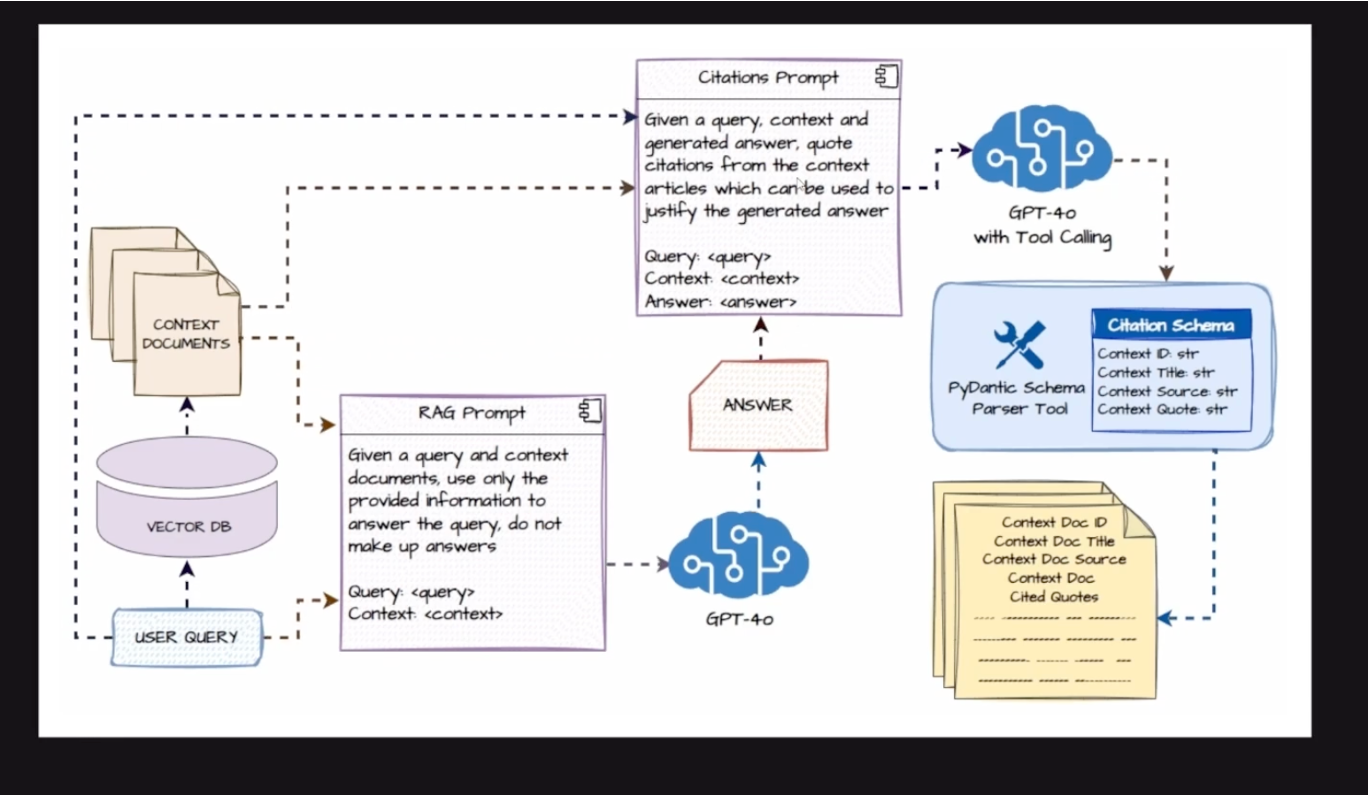

In [27]:
from langchain_core.prompts import ChatPromptTemplate

rag_prompt = """You are an assistant who is an expert in question-answering tasks.
                Answer the following question using only the following pieces of retrieved context.
                If the answer is not in the context, do not make up answers, just say that you don't know.
                Keep the answer detailed and well formatted based on the information from the context.

                Question:
                {question}

                Context:
                {context}

                Answer:
            """

rag_prompt_template = ChatPromptTemplate.from_template(rag_prompt)
rag_prompt_template.pretty_print()

================================ Human Message =================================

You are an assistant who is an expert in question-answering tasks.
                Answer the following question using only the following pieces of retrieved context.
                If the answer is not in the context, do not make up answers, just say that you don't know.
                Keep the answer detailed and well formatted based on the information from the context.

                Question:
                {question}

                Context:
                {context}

                Answer:
            


In [28]:
citations_prompt = """You are an assistant who is an expert in analyzing answers to questions
                      and finding out referenced citations from context articles.

                      Given the following question, context and generated answer,
                      analyze the generated answer and quote citations from context articles
                      that can be used to justify the generated answer.

                      Question:
                      {question}

                      Context Articles:
                      {context}

                      Answer:
                      {answer}
                  """

cite_prompt_template = ChatPromptTemplate.from_template(citations_prompt)
cite_prompt_template.pretty_print()

================================ Human Message =================================

You are an assistant who is an expert in analyzing answers to questions
                      and finding out referenced citations from context articles.

                      Given the following question, context and generated answer,
                      analyze the generated answer and quote citations from context articles
                      that can be used to justify the generated answer.

                      Question:
                      {question}

                      Context Articles:
                      {context}

                      Answer:
                      {answer}
                  


In [29]:
from pydantic import BaseModel, Field
from typing import List

class Citation(BaseModel):
    id: str = Field(description="""The string ID of a SPECIFIC context article
                                   which justifies the answer.""")
    source: str = Field(description="""The source of the SPECIFIC context article
                                       which justifies the answer.""")
    title: str = Field(description="""The title of the SPECIFIC context article
                                      which justifies the answer.""")
    page: int = Field(description="""The page number of the SPECIFIC context article
                                     which justifies the answer.""")
    quotes: str = Field(description="""The VERBATIM sentences from the SPECIFIC context article
                                      that are used to generate the answer.
                                      Should be exact sentences from context article without missing words.""")


class QuotedCitations(BaseModel):
    """Quote citations from given context articles
       that can be used to justify the generated answer. Can be multiple articles."""
    citations: List[Citation] = Field(description="""Citations (can be multiple) from the given
                                                     context articles that justify the answer.""")

In [30]:
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.runnables import RunnableLambda
from operator import itemgetter


chatgpt = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
structured_chatgpt = chatgpt.with_structured_output(QuotedCitations)


def format_docs_with_metadata(docs: List[Document]) -> str:
    formatted_docs = [
        f"""Context Article ID: {doc.metadata['id']}
            Context Article Source: {doc.metadata['source']}
            Context Article Title: {doc.metadata['title']}
            Context Article Page: {doc.metadata['page']}
            Context Article Details: {doc.page_content}
         """
            for i, doc in enumerate(docs)
    ]
    return "\n\n" + "\n\n".join(formatted_docs)

rag_response_chain = (
    {
        "context": (itemgetter('context')
                        |
                    RunnableLambda(format_docs_with_metadata)),
        "question": itemgetter("question")
    }
        |
    rag_prompt_template
        |
    chatgpt
        |
    StrOutputParser()
)

cite_response_chain = (
    {
        "context": itemgetter('context'),
        "question": itemgetter("question"),
        "answer": itemgetter("answer")
    }
        |
    cite_prompt_template
        |
    structured_chatgpt
)

rag_chain_w_citations = (
    {
        "context": similarity_retriever,
        "question": RunnablePassthrough()
    }
        |
    RunnablePassthrough.assign(answer=rag_response_chain)
        |
    RunnablePassthrough.assign(citations=cite_response_chain)
)

In [34]:
#query = "How are CD4+ T cell differentiation regulated?"
#result = rag_chain_w_citations.invoke(query)
#result

In [35]:
#result['citations'].dict()['citations']

In [31]:
import re
# used mostly for nice display formatting, ignore if not needed
def get_cited_context(result_obj):
    # Dictionary to hold separate citation information for each unique source and title combination
    source_with_citations = {}

    def highlight_text(context, quote):
        # Normalize whitespace and remove unnecessary punctuation
        quote = re.sub(r'\s+', ' ', quote).strip()
        context = re.sub(r'\s+', ' ', context).strip()

        # Split quote into phrases, being careful with punctuation
        phrases = [phrase.strip() for phrase in re.split(r'[.!?]', quote) if phrase.strip()]

        highlighted_context = context

        for phrase in phrases: # for each quoted phrase

            # Create regex pattern to match cited phrases
            # Escape special regex characters, but preserve word boundaries
            escaped_phrase = re.escape(phrase)
            # Create regex pattern that allows for slight variations
            pattern = re.compile(r'\b' + escaped_phrase + r'\b', re.IGNORECASE)

            # Replace all matched phrases with bolded version
            highlighted_context = pattern.sub(lambda m: f"**{m.group(0)}**", highlighted_context)

        return highlighted_context

    # Process the citation data
    for cite in result_obj['citations'].dict()['citations']:
        cite_id = cite['id']
        title = cite['title']
        source = cite['source']
        page = cite['page']
        quote = cite['quotes']

        # Check if the (source, title) key exists, and initialize if it doesn't
        if (source, title) not in source_with_citations:
            source_with_citations[(source, title)] = {
                'title': title,
                'source': source,
                'citations': []
            }

        # Find or create the citation entry for this unique (id, page) combination
        citation_entry = next(
            (c for c in source_with_citations[(source, title)]['citations'] if c['id'] == cite_id and c['page'] == page),
            None
        )
        if citation_entry is None:
            citation_entry = {'id': cite_id, 'page': page, 'quote': [quote], 'context': None}
            source_with_citations[(source, title)]['citations'].append(citation_entry)
        else:
            citation_entry['quote'].append(quote)

    # Process context data
    for context in result_obj['context']:
        context_id = context.metadata['id']
        context_page = context.metadata['page']
        source = context.metadata['source']
        title = context.metadata['title']
        page_content = context.page_content

        # Match the context to the correct citation entry by source, title, id, and page
        if (source, title) in source_with_citations:
            for citation in source_with_citations[(source, title)]['citations']:
                if citation['id'] == context_id and citation['page'] == context_page:
                    # Apply highlighting for each quote in the citation's quote list
                    highlighted_content = page_content
                    for quote in citation['quote']:
                        highlighted_content = highlight_text(highlighted_content, quote)
                    citation['context'] = highlighted_content

    # Convert the dictionary to a list of dictionaries for separate entries
    final_result_list = [
        {
            'title': details['title'],
            'source': details['source'],
            'citations': details['citations']
        }
        for details in source_with_citations.values()
    ]

    return final_result_list


In [32]:
#get_cited_context(result)

In [33]:
from IPython.display import display, Markdown

def display_results(result_obj):
    print('Query:')
    display(Markdown(result_obj['question']))
    print()
    print('Response:')
    display(Markdown(result_obj['answer']))
    print('='*50)
    print('Sources:')
    cited_context = get_cited_context(result_obj)
    for source in cited_context:
        print('Title:', source['title'], ' ', 'Source:', source['source'])
        print('Citations:')
        for citation in source['citations']:
            print('ID:', citation['id'], ' ', 'Page:', citation['page'])
            print('Cited Quotes:')
            display(Markdown('*'+' '.join(citation['quote'])+'*'))
            print('Cited Context:')
            display(Markdown(citation['context']))
            print()


In [36]:
query = "How are CD4+ T cell differentiation regulated?"
result = rag_chain_w_citations.invoke(query)
display_results(result)

Query:


How are CD4+ T cell differentiation regulated?


Response:


CD4+ T cell differentiation is regulated through a complex interplay of cytokine signaling and transcription factor activity. The differentiation process involves multiple, mutually cross-linked signaling pathways that form intricate networks. Here are the key points regarding the regulation of CD4+ T cell differentiation:

1. **Cytokine Signaling**: The differentiation of naive CD4+ T cells into various subtypes (such as Th1, Th2, Th17, and iTreg) is primarily influenced by the presence and concentration of specific cytokines. For instance:
   - **IL-12, IL-27, and IL-18** play significant roles in promoting Th1 differentiation, while **IL-4** is crucial for Th2 differentiation.
   - The balance between Th1 and Th2 responses can be shifted by varying levels of these cytokines, which contributes to T cell plasticity.

2. **Transcription Factors**: The differentiation is also governed by lineage-specifying transcription factors (TFs) such as Tbet, GATA3, RORγt, and Foxp3. These factors are activated or inhibited by the cytokine signals received:
   - **Tbet** is associated with Th1 differentiation, while **GATA3** is linked to Th2 differentiation. 
   - The activity of these transcription factors can be modulated by the cytokine environment; for example, high levels of IL-12 can enhance Tbet activity while suppressing GATA3.

3. **Phenotypic Plasticity**: Recent studies indicate that some T helper cells can switch phenotypes based on the combination of signals they receive. For example, iTregs and Th17 cells can switch from one phenotype to another in response to cytokines like IL-6. This plasticity allows for a dynamic immune response tailored to specific challenges.

4. **Complex Phenotypes**: The model of CD4+ T cell differentiation predicts not only canonical phenotypes (Th1, Th2, Th17, iTreg) but also complex phenotypes that exhibit characteristics of multiple T cell types. For instance, Th1–Th2 and Th1–iTreg hybrid cells have been observed, indicating that T cell differentiation is not strictly linear but can result in mixed phenotypes depending on the signaling context.

5. **Mechanistic Computational Models**: Researchers have developed mechanistic computational models to analyze the dynamics of T cell differentiation pathways. These models incorporate various components, including cytokines and transcription factors, to simulate how different input compositions can lead to distinct T cell outputs.

In summary, CD4+ T cell differentiation is a highly regulated process influenced by cytokine signaling, transcription factor activity, and the potential for phenotypic switching, all of which are modeled through complex signaling networks.

Sources:
Title: A_mechanistic_computation_approach.pdf   Source: ./infection_studies/A_mechanistic_computation_approach.pdf
Citations:
ID: 1503ea37-cee3-449b-8f69-623a07ff944d   Page: 1
Cited Quotes:


<ipython-input-31-d31ac6434ea1>:31: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  for cite in result_obj['citations'].dict()['citations']:


*The diﬀerentiation process is governed by the regulation of multiple, mutually cross-linked signaling pathways, which form complex networks (Zhu et al., 2010). The stimulation of the naive CD4+ T cells by various cytokines triggers a cascade of signaling events, such as the activation of the JAK/STAT pathways that lead to the activation of T cell lineage-specifying.*

Cited Context:


Focuses on the classification and functional roles of various CD4+ T cell subtypes, including Th1, Th2, iTregs, Th17, Th9, and Tfh cells, as well as the mechanisms of plasticity and differentiation influenced by cytokine signaling. It highlights the complexity of T cell responses and the potential for phenotypic switching among these subtypes in the context of immune regulation. Puniya et al. Cytokine Mediated Regulation of T cell Differentiation INTRODUCTION The diversity and number of immunity-related diseases require a high level of heterogeneity in the immune system to maintain the overall well-being of a human. Early studies of immune responses led to a discovery that the CD4+ T cells (referred to as T cells), which are critical players in immunity, can be classiﬁed into two subtypes - T helper 1 (Th1) and T helper 2 (Th2) cells (Mosmann et al., 1986). Each type of eﬀector T cell produces a speciﬁc set of cytokines that deﬁne the function of the cell and the way it further governs the immune response. Speciﬁcally, the Th1 cells are responsible for several autoimmune diseases, whereas the Th2 cells are the mediators in cases of allergy and asthma (Reiner, 2007; Zhu and Paul, 2008). More recently, a number of additional T cell subtypes, including the inducible regulatory T cells (iTregs) (Groux et al., 1997; Chen et al., 2003; Schmitt and Williams, 2013), T helper 17 (Th17) (Romagnani, 2000; Harrington et al., 2005; Mangan et al., 2006), T helper 9 (Th9) (Dardalhon et al., 2008; Veldhoen et al., 2008; Soroosh and Doherty, 2009), and follicular T helper cells (Tfh) (Breitfeld et al., 2000; Schaerli et al., 2000) have been discovered, and their functions have been extensively studied. For example, the Th17 cells have been found to be responsible for assisting the immune response against extracellular bacteria and fungi, whereas the main role of the iTregs is to maintain the balance and regulate immune responses by the T helper cell subtypes (Zhu and Paul, 2008). The Th9 cells have been found to be involved in pathogen immunity and inﬂammatory diseases (Kaplan, 2013). Finally, the Tfh cells assist in T cell-dependent B cell response (Breitfeld et al., 2000; Schaerli et al., 2000; Ma et al., 2012). In addition, recent studies suggest that some T helper cells are capable of switching and exhibiting phenotypes of one of the alternative eﬀector T cells, depending on the combination of input signals that the cell receives. For example, the iTregs and Th17 can switch from one phenotype to the other in response to the pleiotropic cytokine interleukin-6 (IL-6) (Xu et al., 2007; Lee et al., 2009a; Rowell and Wilson, 2009; Kimura and Kishimoto, 2010). The fully diﬀerentiated Th17 cells have been observed to produce Th1-cell-speciﬁc cytokines (Shi et al., 2008; Lee et al., 2009b; Nindl et al., 2012; Harbour et al., 2015). The Th2 cells have been reported to further develop into Th9 cells (Veldhoen et al., 2008). More complexity in T cell diﬀerentiation was observed in the form of co-expression of mutually exclusive lineage- specifying transcription factors (TFs) (Peine et al., 2013; Bock et al., 2017). This co-expression can lead to the development of stable or intermediate subtypes that share characteristics of more than one type of T cell (Tartar et al., 2010). Examples of such mixed (complex) phenotypes include Th1–Th2 (Peine et al., 2013; Bock et al., 2017) and Th1–Th17 (Kullberg et al., 2006; Morrison et al., 2013). **The diﬀerentiation process is governed by the regulation of multiple, mutually cross-linked signaling pathways, which form complex networks (Zhu et al**., 2010). **The stimulation of the naive CD4+ T cells by various cytokines triggers a cascade of signaling events, such as the activation of the JAK/STAT pathways that lead to the activation of T cell lineage-specifying**


ID: 703b391d-2e56-4a9d-8781-117141bd3359   Page: 3
Cited Quotes:


*The modeled pathways reﬂect the canonical pathways known to regulate T cell differentiation into the major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). The model includes 38 components, including four lineage-specifying TFs (Tbet, GATA3, RORγt, and Foxp3) and nine extracellular components: TCR-ligand, IFN-γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27.*

Cited Context:


Focuses on the network diagram of the logical model that illustrates the signal transduction pathways regulating CD4+ T cell differentiation into major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). It details the components of the model, including lineage-specifying transcription factors and extracellular signals, while summarizing the predicted canonical and complex phenotypes resulting from various input compositions. Puniya et al. Cytokine Mediated Regulation of T cell Differentiation FIGURE 1 | Network diagram of the logical model of signal transduction in CD4+ T cells. The modeled pathways reﬂect the canonical pathways known to regulate T cell differentiation into the major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). **The model includes 38 components, including four lineage-specifying TFs (Tbet, GATA3, RORγt, and Foxp3) and nine extracellular components: TCR-ligand, IFN-γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27**. Green arrows represent activation, red arrows represent inhibition, and gray arrows represent the conditions associated with activatory or inhibitory interactions. IFNg_e, interferon-γ (external); IL12, interleukin 12; IL18, interleukin 18; IL23, interleukin 23; IL27, interleukin 27; IL4_e, interleukin 4 (external); IL6_e, interleukin 6 (external); TCR, T cell receptor; TGFb, transforming growth factor-β; Foxp3, Forkhead box P3; GATA3, GATA-binding protein 3; IFNg, interferon-γ; IFNgR, interferon-γ receptor (generic); IL12R, interleukin 12 receptor (generic); IL17, interleukin 17; IL18R, interleukin 18 receptor 1; IL2, interleukin 2; IL21, interleukin 21; IL21R, interleukin 21 receptor; IL23R, interleukin 23 receptor; IL2R, interleukin 2 receptor; IL4, interleukin 4; IL4R, interleukin 4 receptor; IL6, interleukin 6; IL6R, interleukin 6 receptor; IRAK, interleukin-1 receptor associated kinase 1; Jak1, Janus kinase 1; NFAT, nuclear factor of activated T cells 5, tonicity-responsive; NF-κB, nuclear factor of kappa light polypeptide gene enhancer in B cells (generic); RORgt, RAR-related orphan receptor C; SOCS1, suppressor of cytokine signaling 1; STAT1, signal transducer and activator 1; STAT3, signal transducer and activator 3; STAT4, signal transducer and activator 4; STAT5, signal transducer and activator 5; STAT6, signal transducer and activator 6; Tbet, T-box expressed in T cells; TGFbR, transforming growth factor-β receptor (generic). present (Th0 phenotype). Most of the outputs that represent the Th0 phenotype (>95%) were stimulated by the input compositions with an inactive TCR ligand. The remaining Th0- leading input compositions contained an active TCR ligand along with IL-23, or IL-18, or IL-6. This corresponds to the experimentally established scenarios, whereby the T cells cannot diﬀerentiate in the absence of TCR activation or in the absence of key lineage-speciﬁc cytokines (Podojil and Miller, 2009; Zhu et al., 2010; Chen and Flies, 2013). Fifty- two input compositions led to 16 outputs with active Tbet, representing the Th1 phenotype. A total of 24 input compositions produce 10 outputs with active GATA3, representing the Th2 phenotype, while four input compositions led to one output with active Foxp3, representing the iTreg phenotype. We did not observe distinct outputs with only RORγt active; instead, RORγt was part of the complex phenotypes (discussed below). In addition to the four canonical phenotypes, the model predicted six complex phenotypes. The number of input compositions, and the number of outputs that represent each complex phenotype, is summarized in Figure 3C. Of the six complex phenotypes, three of them including Th1–Th2 (Hegazy et al., 2010; Evans and Jenner, 2013; Peine et al., 2013), Th1–iTreg (Koch et al., 2009), and Th17–iTreg (Eisenstein and Williams, 2009) were experimentally observed earlier, thus further validating the model. The model also predicted three


ID: 2c9c3f54-7cdc-4de6-a4bd-c2ed6338f243   Page: 9
Cited Quotes:


*It discusses how varying levels of these cytokines can shift the balance between Th1 and Th2 responses, contributing to the understanding of T cell plasticity and the regulatory mechanisms involved in immune responses.*

Cited Context:


Focuses on the influence of cytokine activity, specifically IL-12, IL-27, and IL-18, on the differentiation of CD4+ T cells into Th1 and Th2 phenotypes. **It discusses how varying levels of these cytokines can shift the balance between Th1 and Th2 responses, contributing to the understanding of T cell plasticity and the regulatory mechanisms involved in immune responses**. The discussion elaborates on the construction of a mechanistic computational model to analyze these dynamics. ligand or increased activity of IL-12 and IL-27 can drive the Th1– Th2 phenotype toward Th1 by increasing the activity of Tbet and decreasing the activity of GATA3. In contrast, the increased activity of IL-18 can drive Th1–Th2 phenotypes toward Th2. DISCUSSION In this study, we sought to investigate the cellular phenotypes as a result of CD4+ T cell diﬀerentiation under diverse environmental conditions and understand how the balance between complex phenotypes is regulated. To achieve this, by manually curating literature data, we constructed a mechanistic computational (logical) model of signal transduction that regulates the diﬀerentiation of naive T cells into Th1, Th2, Th17, and iTreg cells. The components (i.e., proteins and genes) in a logical model can have binary (0 or 1) states at any time t. The state of the network evolves stepwise based on the logical rules deﬁned for each model component (Helikar and Rogers, 2009; Helikar et al., 2012a,b, 2013; Naldi et al., 2015; Abou-Jaoudé et al., 2016; Barberis and Verbruggen, 2017; Linke et al., 2017). Frontiers in Physiology | www.frontiersin.org 10 August 2018 | Volume 9 | Article 878


ID: 27b7fc3b-accc-4c63-9d1d-73b36a26bcbd   Page: 15
Cited Quotes:


*It references key research articles that explore the mechanisms of Th1 and Th2 cell differentiation, hybrid cell phenotypes, and the regulatory networks involved in T cell function.*

Cited Context:


Focuses on various studies that contribute to the understanding of CD4+ T cell differentiation and plasticity, highlighting the roles of specific cytokines and transcription factors in shaping T cell responses. **It references key research articles that explore the mechanisms of Th1 and Th2 cell differentiation, hybrid cell phenotypes, and the regulatory networks involved in T cell function**. Becskei, A., and Grusby, M. J. (2007). Contribution of IL-12R mediated feedback loop to Th1 cell diﬀerentiation. FEBS Lett. 581, 5199–5206. doi: 10.1016/j. febslet.2007.10.007 Bock, C. N., Babu, S., Breloer, M., Rajamanickam, A., Boothra, Y., Brunn, M.-L., et al. (2017). Th2/1 hybrid cells occurring in murine and human strongyloidiasis share eﬀector functions of Th1 cells. Front. Cell. Infect. Microbiol. 7:261. doi: 10.3389/fcimb.2017.00261 Breitfeld, D., Ohl, L., Kremmer, E., Ellwart, J., Sallusto, F., Lipp, M., et al. (2000). Follicular B helper T cells express CXC chemokine receptor 5, localize to B cell follicles, and support immunoglobulin production. J. Exp. Med. 192, 1545–1552. doi: 10.1084/jem.192.11.1545 Carbo, A., Hontecillas, R., Kronsteiner, B., Viladomiu, M., Pedragosa, M., Lu, P., et al. (2013). Systems modeling of molecular mechanisms controlling cytokine- driven CD4 + T cell diﬀerentiation and phenotype plasticity. PLoS Comput. Biol. 9:e1003027. doi: 10.1371/journal.pcbi.1003027 Carbo, A., Olivares-Villagómez, D., Hontecillas, R., Bassaganya-Riera, J., Chaturvedi, R., Blanca Piazuelo, M., et al. (2014). Systems modeling of the role of interleukin-21 in the maintenance of eﬀector CD4 + T cell responses during chronic Helicobacter pylori infection. mBio 5, 1–11. doi: 10.1128/mBio.01243- 14 Chaouiya, C., Bérenguier, D., Keating, S. M., Naldi, A., van Iersel, M. P., Rodriguez, N., et al. (2013). SBML qualitative models: a model representation format and infrastructure to foster interactions between qualitative modelling formalisms and tools. BMC Syst. Biol. 7:135. doi: 10.1186/1752-0509-7-135 Chen, L., and Flies, D. B. (2013). Molecular mechanisms of T cell co-stimulation and co-inhibition. Nat. Rev. Immunol. 13, 227–242. doi: 10.1038/nri3405 Chen, W., Jin, W., Hardegen, N., Lei, K., Li, L., Marinos, N., et al. (2003). Conversion of peripheral CD4+CD25−naive T cells to CD4+CD25+regulatory T cells by TGF-β induction of transcription factor Foxp3. J. Exp. Med. 198, 1875–1886. doi: 10.1084/jem.20030152 Chen, Z., Ding, J., Pang, N., Du, R., and Meng, W. (2013). The Th17/Treg balance and the expression of related cytokines in Uygur cervical cancer patients. Diagn. Pathol. 8:61. doi: 10.1186/1746-1596-8-61 Dardalhon, V., Awasthi, A., Kwon, H., Galileos, G., Gao, W., Sobel, R. A., et al. (2008). IL-4 inhibits TGF-beta-induced Foxp3+ T cells and, together with TGF-beta, generates IL-9+IL-10+ Foxp3(-) eﬀector T cells. Nat. Immunol. 9, 1347–1355. doi: 10.1038/ni.1677 Duan, M.-C., Han, W., Jin, P.-W., Wei, Y.-P., Wei, Q., Zhang, L.-M., et al. (2015). Disturbed Th17/Treg balance in patients with non-small cell lung cancer. Inﬂammation 38, 2156–2165. doi: 10.1007/s10753-015-0198-x Eisenstein, E. M., and Williams, C. B. (2009). The Treg/Th17 cell balance: a new paradigm for autoimmunity. Pediatr. Res. 65, 26R–31R. doi: 10.1203/PDR. 0b013e31819e76c7 Eizenberg-Magar, I., Rimer, J., Zaretsky, I., Lara-Astiaso, D., Reich-Zeliger, S., and Friedman, N. (2017). Diverse continuum of CD4+ T cell states is determined by hierarchical additive integration of cytokine signals. Proc. Natl. Acad. Sci. U.S.A. 114, E6447–E6456. doi: 10.1073/pnas.1615590114 Evans, C. M., and Jenner, R. G. (2013). Transcription factor interplay in t helper cell diﬀerentiation. Brief. Funct. Genomics 12, 499–511. doi: 10.1093/bfgp/elt025 Fang, D., and Zhu, J. (2017). Dynamic balance between master transcription factors


ID: 50e512ae-5375-4ef7-8669-170ad2e281cd   Page: 13
Cited Quotes:


*The computational model is a mechanistic, logic-based model of signal transduction processes known to regulate CD4+ T cell diﬀerentiation into Th1, Th2, Th17, and iTreg cells.*

Cited Context:


Focuses on the effects of IL-12 on GATA3 activity in CD4+ T cell differentiation, highlighting the dual role of IL-12 in up-regulating IL-18R and activating NF-κB, which influences GATA3 levels. It emphasizes the importance of understanding cytokine dosage and timing in T cell responses and discusses the implications for immunotherapy strategies. Additionally, it introduces the model construction for analyzing T cell differentiation pathways. Puniya et al. Cytokine Mediated Regulation of T cell Differentiation 2012). Interestingly, our results showed an increase as well as a decrease in the activity levels of GATA3 depending on the activity levels of IL-12. This can be achieved as a result of IL- 12 up-regulating IL-18R, which induces NF-κB-mediated GATA3 activation. On the other hand, a higher activity of IL-12 results in a strong Tbet activation, which in turn suppresses GATA3. Although the predicted activity levels are dimensionless and semi-quantitative, they provide a starting point for calibrations against ligand concentrations in speciﬁc experimental research protocols. In summary, results provided in this study can provide a platform to generate and design testable hypotheses in the context of T cell diﬀerentiation in response to various combinations and dosage of environmental signals. Furthermore, the presented results and the mechanistic model can be used as tools to further investigate the speciﬁc pathway mechanisms that govern each complex phenotype. Input availability and relative dosage at which inputs generate a productive signaling cascade necessarily result in a variable timing of an immune response. Speciﬁcally, we and others propose that dosage- and timing-dependent impact of inputs, such as ILs, may impact the T cell diﬀerentiation (Barberis et al., 2018; Martinez-Sanchez et al., 2018). This may be investigated by employing experimental methodologies that we have recently envisioned (Barberis and Verbruggen, 2017). Furthermore, crosstalk between ILs and signaling cascades, such as the one governing the cell cycle, may impinge on a timely T cell-mediated protective response (Barberis et al., 2018). These aspects are the focus of our current research eﬀorts. Together with new model-based predictions, improving the understanding of the detailed mechanisms underlying T cell diﬀerentiation, can be helpful to design strategies for immunotherapy against pathogens and various diseases of the immune system. MATERIALS AND METHODS Model Construction **The computational model is a mechanistic, logic-based model of signal transduction processes known to regulate CD4+ T cell diﬀerentiation into Th1, Th2, Th17, and iTreg cells**. Each component of the model can assume an active (1) or inactive (0) state at any time t. The activity state of the model’s internal components is determined by the regulatory mechanisms of other directly interacting components. These regulatory mechanisms are described with Boolean functions (Samaga and Klamt, 2013; Albert and Thakar, 2014; Le Novère, 2015; Naldi et al., 2015; Abou-Jaoudé et al., 2016; Linke et al., 2017). The new signal transduction model was constructed manually by curating published regulatory mechanisms of each signal transduction component. Each of the 38 components in the model corresponds to a signaling molecule (mainly proteins). The model also contains nine external components that represent the extracellular environment, consisting of eight cytokines (IFN- γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27) and a generic TCR ligand. The ﬁnal model consists of 38 components (29 internal and 9 external) connected with 96 interactions. The model is fully annotated with published evidence for each component and interaction to ensure transparency and reproducibility. The model is available via the web-based modeling and analysis platform Cell Collective (Helikar et al.,

In [37]:
query = "What are the products in CD4+ T cell differentiation?"
result = rag_chain_w_citations.invoke(query)
display_results(result)

Query:


What are the products in CD4+ T cell differentiation?


Response:


The products in CD4+ T cell differentiation include several distinct subtypes, each characterized by specific functions and cytokine profiles. According to the retrieved context, the main products of CD4+ T cell differentiation are:

1. **T Helper 1 (Th1) Cells**: These cells are primarily involved in the immune response against intracellular pathogens and are associated with autoimmune diseases. They produce cytokines such as interferon-gamma (IFN-γ).

2. **T Helper 2 (Th2) Cells**: Th2 cells play a crucial role in mediating allergic responses and asthma. They produce cytokines like interleukin-4 (IL-4), which are important for the activation of B cells and the production of antibodies.

3. **Inducible Regulatory T Cells (iTregs)**: These cells are essential for maintaining immune tolerance and preventing autoimmune responses. They produce cytokines such as transforming growth factor-beta (TGF-β) and are characterized by the expression of the transcription factor Foxp3.

4. **T Helper 17 (Th17) Cells**: Th17 cells are involved in the defense against extracellular bacteria and fungi. They produce cytokines like IL-17 and are implicated in various inflammatory diseases.

5. **T Helper 9 (Th9) Cells**: These cells are associated with immunity against parasites and are involved in inflammatory responses. They produce IL-9 and IL-10.

6. **Follicular T Helper (Tfh) Cells**: Tfh cells assist in the activation of B cells and the production of antibodies, playing a critical role in T cell-dependent B cell responses.

Additionally, the context mentions the existence of **complex phenotypes** that arise from the co-expression of lineage-specifying transcription factors, leading to mixed characteristics of the aforementioned subtypes. Examples of these complex phenotypes include Th1–Th2, Th1–iTreg, and Th17–iTreg, which reflect the plasticity and adaptability of CD4+ T cells in response to various cytokine signals and environmental conditions. 

Overall, the differentiation of CD4+ T cells results in a diverse array of functional subtypes that are crucial for the regulation and execution of immune responses.

Sources:
Title: A_mechanistic_computation_approach.pdf   Source: ./infection_studies/A_mechanistic_computation_approach.pdf
Citations:
ID: 1503ea37-cee3-449b-8f69-623a07ff944d   Page: 1
Cited Quotes:


<ipython-input-31-d31ac6434ea1>:31: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  for cite in result_obj['citations'].dict()['citations']:


*Focuses on the classification and functional roles of various CD4+ T cell subtypes, including Th1, Th2, iTregs, Th17, Th9, and Tfh cells, as well as the mechanisms of plasticity and differentiation influenced by cytokine signaling.*

Cited Context:


**Focuses on the classification and functional roles of various CD4+ T cell subtypes, including Th1, Th2, iTregs, Th17, Th9, and Tfh cells, as well as the mechanisms of plasticity and differentiation influenced by cytokine signaling**. It highlights the complexity of T cell responses and the potential for phenotypic switching among these subtypes in the context of immune regulation. Puniya et al. Cytokine Mediated Regulation of T cell Differentiation INTRODUCTION The diversity and number of immunity-related diseases require a high level of heterogeneity in the immune system to maintain the overall well-being of a human. Early studies of immune responses led to a discovery that the CD4+ T cells (referred to as T cells), which are critical players in immunity, can be classiﬁed into two subtypes - T helper 1 (Th1) and T helper 2 (Th2) cells (Mosmann et al., 1986). Each type of eﬀector T cell produces a speciﬁc set of cytokines that deﬁne the function of the cell and the way it further governs the immune response. Speciﬁcally, the Th1 cells are responsible for several autoimmune diseases, whereas the Th2 cells are the mediators in cases of allergy and asthma (Reiner, 2007; Zhu and Paul, 2008). More recently, a number of additional T cell subtypes, including the inducible regulatory T cells (iTregs) (Groux et al., 1997; Chen et al., 2003; Schmitt and Williams, 2013), T helper 17 (Th17) (Romagnani, 2000; Harrington et al., 2005; Mangan et al., 2006), T helper 9 (Th9) (Dardalhon et al., 2008; Veldhoen et al., 2008; Soroosh and Doherty, 2009), and follicular T helper cells (Tfh) (Breitfeld et al., 2000; Schaerli et al., 2000) have been discovered, and their functions have been extensively studied. For example, the Th17 cells have been found to be responsible for assisting the immune response against extracellular bacteria and fungi, whereas the main role of the iTregs is to maintain the balance and regulate immune responses by the T helper cell subtypes (Zhu and Paul, 2008). The Th9 cells have been found to be involved in pathogen immunity and inﬂammatory diseases (Kaplan, 2013). Finally, the Tfh cells assist in T cell-dependent B cell response (Breitfeld et al., 2000; Schaerli et al., 2000; Ma et al., 2012). In addition, recent studies suggest that some T helper cells are capable of switching and exhibiting phenotypes of one of the alternative eﬀector T cells, depending on the combination of input signals that the cell receives. For example, the iTregs and Th17 can switch from one phenotype to the other in response to the pleiotropic cytokine interleukin-6 (IL-6) (Xu et al., 2007; Lee et al., 2009a; Rowell and Wilson, 2009; Kimura and Kishimoto, 2010). The fully diﬀerentiated Th17 cells have been observed to produce Th1-cell-speciﬁc cytokines (Shi et al., 2008; Lee et al., 2009b; Nindl et al., 2012; Harbour et al., 2015). The Th2 cells have been reported to further develop into Th9 cells (Veldhoen et al., 2008). More complexity in T cell diﬀerentiation was observed in the form of co-expression of mutually exclusive lineage- specifying transcription factors (TFs) (Peine et al., 2013; Bock et al., 2017). This co-expression can lead to the development of stable or intermediate subtypes that share characteristics of more than one type of T cell (Tartar et al., 2010). Examples of such mixed (complex) phenotypes include Th1–Th2 (Peine et al., 2013; Bock et al., 2017) and Th1–Th17 (Kullberg et al., 2006; Morrison et al., 2013). The diﬀerentiation process is governed by the regulation of multiple, mutually cross-linked signaling pathways, which form complex networks (Zhu et al., 2010). The stimulation of the naive CD4+ T cells by various cytokines triggers a cascade of signaling events, such as the activation of the JAK/STAT pathways that lead to the activation of T cell lineage-specifying


ID: 703b391d-2e56-4a9d-8781-117141bd3359   Page: 3
Cited Quotes:


*The modeled pathways reflect the canonical pathways known to regulate T cell differentiation into the major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg).*

Cited Context:


Focuses on the network diagram of the logical model that illustrates the signal transduction pathways regulating CD4+ T cell differentiation into major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). It details the components of the model, including lineage-specifying transcription factors and extracellular signals, while summarizing the predicted canonical and complex phenotypes resulting from various input compositions. Puniya et al. Cytokine Mediated Regulation of T cell Differentiation FIGURE 1 | Network diagram of the logical model of signal transduction in CD4+ T cells. The modeled pathways reﬂect the canonical pathways known to regulate T cell differentiation into the major effector subtypes (Th1, Th2, Th17) and the regulatory subtype (iTreg). The model includes 38 components, including four lineage-specifying TFs (Tbet, GATA3, RORγt, and Foxp3) and nine extracellular components: TCR-ligand, IFN-γ, TGF-β, IL-4, IL-6, IL-12, IL-18, IL-23, and IL-27. Green arrows represent activation, red arrows represent inhibition, and gray arrows represent the conditions associated with activatory or inhibitory interactions. IFNg_e, interferon-γ (external); IL12, interleukin 12; IL18, interleukin 18; IL23, interleukin 23; IL27, interleukin 27; IL4_e, interleukin 4 (external); IL6_e, interleukin 6 (external); TCR, T cell receptor; TGFb, transforming growth factor-β; Foxp3, Forkhead box P3; GATA3, GATA-binding protein 3; IFNg, interferon-γ; IFNgR, interferon-γ receptor (generic); IL12R, interleukin 12 receptor (generic); IL17, interleukin 17; IL18R, interleukin 18 receptor 1; IL2, interleukin 2; IL21, interleukin 21; IL21R, interleukin 21 receptor; IL23R, interleukin 23 receptor; IL2R, interleukin 2 receptor; IL4, interleukin 4; IL4R, interleukin 4 receptor; IL6, interleukin 6; IL6R, interleukin 6 receptor; IRAK, interleukin-1 receptor associated kinase 1; Jak1, Janus kinase 1; NFAT, nuclear factor of activated T cells 5, tonicity-responsive; NF-κB, nuclear factor of kappa light polypeptide gene enhancer in B cells (generic); RORgt, RAR-related orphan receptor C; SOCS1, suppressor of cytokine signaling 1; STAT1, signal transducer and activator 1; STAT3, signal transducer and activator 3; STAT4, signal transducer and activator 4; STAT5, signal transducer and activator 5; STAT6, signal transducer and activator 6; Tbet, T-box expressed in T cells; TGFbR, transforming growth factor-β receptor (generic). present (Th0 phenotype). Most of the outputs that represent the Th0 phenotype (>95%) were stimulated by the input compositions with an inactive TCR ligand. The remaining Th0- leading input compositions contained an active TCR ligand along with IL-23, or IL-18, or IL-6. This corresponds to the experimentally established scenarios, whereby the T cells cannot diﬀerentiate in the absence of TCR activation or in the absence of key lineage-speciﬁc cytokines (Podojil and Miller, 2009; Zhu et al., 2010; Chen and Flies, 2013). Fifty- two input compositions led to 16 outputs with active Tbet, representing the Th1 phenotype. A total of 24 input compositions produce 10 outputs with active GATA3, representing the Th2 phenotype, while four input compositions led to one output with active Foxp3, representing the iTreg phenotype. We did not observe distinct outputs with only RORγt active; instead, RORγt was part of the complex phenotypes (discussed below). In addition to the four canonical phenotypes, the model predicted six complex phenotypes. The number of input compositions, and the number of outputs that represent each complex phenotype, is summarized in Figure 3C. Of the six complex phenotypes, three of them including Th1–Th2 (Hegazy et al., 2010; Evans and Jenner, 2013; Peine et al., 2013), Th1–iTreg (Koch et al., 2009), and Th17–iTreg (Eisenstein and Williams, 2009) were experimentally observed earlier, thus further validating the model. The model also predicted three


ID: dc56815d-c5f7-440e-815f-f0cc083a77a9   Page: 2
Cited Quotes:


*The model includes 38 components and 96 biochemical interactions that regulate the differentiation process of major T cell subtypes, such as Th1, Th2, Th17, and iTreg cells.*

Cited Context:


Focuses on the results of a mechanistic, logic-based model of T cell differentiation, detailing the identification of four canonical T cell phenotypes (Th0, Th1, Th2, and iTreg) and six complex phenotypes characterized by co-expression of lineage-specifying transcription factors. It highlights the role of input dosage in regulating the balance of specific T cell types within these complex phenotypes, providing insights into the effects of environmental input composition on T cell differentiation. Puniya et al. Cytokine Mediated Regulation of T cell Differentiation well as novel cellular phenotypes. These include four canonical phenotypes of diﬀerentiated T cells (Th0, Th1, Th2, and iTreg) as well as six complex phenotypes, whereby multiple lineage- specifying TFs are co-expressed. Our results also suggest that the input dosage regulates the balance of speciﬁc T cells within the complex T cell phenotypes, providing new insights into speciﬁc patterns of environmental input composition and dosage eﬀects on T cell diﬀerentiation. RESULTS Mechanistic Logical Model of T Cell Differentiation A comprehensive mechanistic, logic-based model of T cell diﬀerentiation was constructed using regulatory information from published literature. The model includes 38 components and 96 biochemical interactions that regulate the diﬀerentiation process of major T cell subtypes, such as Th1, Th2, Th17, and iTreg cells. The individual components of the model represent lineage-specifying TFs (Tbet, GATA3, RORγt, and Foxp3), STAT proteins, cytokines, their receptors, and other signaling molecules. The extracellular environment is represented in the model by eight cytokines and a (generic) TCR ligand, known to play a role in T cell diﬀerentiation. The network representation of the model is visualized in Figure 1. The regulatory interactions in the model are deﬁned as Boolean functions, which are composed of the “AND,” “OR,” and “NOT” operators (Supplementary Datasheets 1 and 2). The fully annotated model is available for download in a number of formats [including SBML-qual (Chaouiya et al., 2013)], as well as for viewing, and performing simulations, analyses, and additional modiﬁcations within the Cell Collective modeling platform1 (Helikar et al., 2012b, 2013). The model can be accessed directly at: https://www.cellcollective. org/#6678/cd4-t-cell-diﬀerentiation. The model was validated to ensure that it can reproduce diﬀerentiation into four canonical phenotypes (Th1, Th2, Th17, and iTreg), as a result of cytokine stimulation and TCR activation (Supplementary Table 1). Furthermore, the model was able to reproduce more complex behaviors (Figure 2). For example, Becskei and Grusby (2007) studied the synergistic eﬀect of positive feedback loops on the expression of the IL- 12 receptor (IL-12R). They showed that the number of IFN- γ positive cells and the expression of IL-12R increased when induced by the combination of IL-12 and IL-27. As shown in Figures 2A,B, simulations of the presented model under similar experimental conditions resulted in the same qualitative behavior. Furthermore, it has been experimentally shown that the IL-6 regulates the balance between iTreg and Th17 cells in a dose-dependent manner (Yang et al., 2008; Kimura and Kishimoto, 2010). Similarly, simulations of the model show a clear distinction between iTreg and Th17 in an IL-6-dependent manner (Figure 2C). Finally, simulations of the model, under environmental conditions similar to those that have been shown to induce the mixed Th1–Th2 behavior (Peine et al., 2013), also 1https://www.cellcollective.org resulted in a complex phenotype with activation of both Tbet and GATA3 TFs (Figure 2D). Novel T Cell Phenotypes Are Predicted by Logical Modeling With the validated model in hand, we sought to understand its capacity to represent various T cell phenotypes. By using ergodic set analysis [see the section “Materials and Methods” and Todd


ID: 27b7fc3b-accc-4c63-9d1d-73b36a26bcbd   Page: 15
Cited Quotes:


*...highlighting the roles of specific cytokines and transcription factors in shaping T cell responses.*

Cited Context:


Focuses on various studies that contribute to the understanding of CD4+ T cell differentiation and plasticity, **highlighting the roles of specific cytokines and transcription factors in shaping T cell responses**. It references key research articles that explore the mechanisms of Th1 and Th2 cell differentiation, hybrid cell phenotypes, and the regulatory networks involved in T cell function. Becskei, A., and Grusby, M. J. (2007). Contribution of IL-12R mediated feedback loop to Th1 cell diﬀerentiation. FEBS Lett. 581, 5199–5206. doi: 10.1016/j. febslet.2007.10.007 Bock, C. N., Babu, S., Breloer, M., Rajamanickam, A., Boothra, Y., Brunn, M.-L., et al. (2017). Th2/1 hybrid cells occurring in murine and human strongyloidiasis share eﬀector functions of Th1 cells. Front. Cell. Infect. Microbiol. 7:261. doi: 10.3389/fcimb.2017.00261 Breitfeld, D., Ohl, L., Kremmer, E., Ellwart, J., Sallusto, F., Lipp, M., et al. (2000). Follicular B helper T cells express CXC chemokine receptor 5, localize to B cell follicles, and support immunoglobulin production. J. Exp. Med. 192, 1545–1552. doi: 10.1084/jem.192.11.1545 Carbo, A., Hontecillas, R., Kronsteiner, B., Viladomiu, M., Pedragosa, M., Lu, P., et al. (2013). Systems modeling of molecular mechanisms controlling cytokine- driven CD4 + T cell diﬀerentiation and phenotype plasticity. PLoS Comput. Biol. 9:e1003027. doi: 10.1371/journal.pcbi.1003027 Carbo, A., Olivares-Villagómez, D., Hontecillas, R., Bassaganya-Riera, J., Chaturvedi, R., Blanca Piazuelo, M., et al. (2014). Systems modeling of the role of interleukin-21 in the maintenance of eﬀector CD4 + T cell responses during chronic Helicobacter pylori infection. mBio 5, 1–11. doi: 10.1128/mBio.01243- 14 Chaouiya, C., Bérenguier, D., Keating, S. M., Naldi, A., van Iersel, M. P., Rodriguez, N., et al. (2013). SBML qualitative models: a model representation format and infrastructure to foster interactions between qualitative modelling formalisms and tools. BMC Syst. Biol. 7:135. doi: 10.1186/1752-0509-7-135 Chen, L., and Flies, D. B. (2013). Molecular mechanisms of T cell co-stimulation and co-inhibition. Nat. Rev. Immunol. 13, 227–242. doi: 10.1038/nri3405 Chen, W., Jin, W., Hardegen, N., Lei, K., Li, L., Marinos, N., et al. (2003). Conversion of peripheral CD4+CD25−naive T cells to CD4+CD25+regulatory T cells by TGF-β induction of transcription factor Foxp3. J. Exp. Med. 198, 1875–1886. doi: 10.1084/jem.20030152 Chen, Z., Ding, J., Pang, N., Du, R., and Meng, W. (2013). The Th17/Treg balance and the expression of related cytokines in Uygur cervical cancer patients. Diagn. Pathol. 8:61. doi: 10.1186/1746-1596-8-61 Dardalhon, V., Awasthi, A., Kwon, H., Galileos, G., Gao, W., Sobel, R. A., et al. (2008). IL-4 inhibits TGF-beta-induced Foxp3+ T cells and, together with TGF-beta, generates IL-9+IL-10+ Foxp3(-) eﬀector T cells. Nat. Immunol. 9, 1347–1355. doi: 10.1038/ni.1677 Duan, M.-C., Han, W., Jin, P.-W., Wei, Y.-P., Wei, Q., Zhang, L.-M., et al. (2015). Disturbed Th17/Treg balance in patients with non-small cell lung cancer. Inﬂammation 38, 2156–2165. doi: 10.1007/s10753-015-0198-x Eisenstein, E. M., and Williams, C. B. (2009). The Treg/Th17 cell balance: a new paradigm for autoimmunity. Pediatr. Res. 65, 26R–31R. doi: 10.1203/PDR. 0b013e31819e76c7 Eizenberg-Magar, I., Rimer, J., Zaretsky, I., Lara-Astiaso, D., Reich-Zeliger, S., and Friedman, N. (2017). Diverse continuum of CD4+ T cell states is determined by hierarchical additive integration of cytokine signals. Proc. Natl. Acad. Sci. U.S.A. 114, E6447–E6456. doi: 10.1073/pnas.1615590114 Evans, C. M., and Jenner, R. G. (2013). Transcription factor interplay in t helper cell diﬀerentiation. Brief. Funct. Genomics 12, 499–511. doi: 10.1093/bfgp/elt025 Fang, D., and Zhu, J. (2017). Dynamic balance between master transcription factors


Title: A_multiapproach_multiscale_platform_to_model_CD4.pdf   Source: ./infection_studies/A_multiapproach_multiscale_platform_to_model_CD4.pdf
Citations:
ID: b20e7749-5540-4e32-924c-0f246e3a766d   Page: 21
Cited Quotes:


*...the roles of various contributors in the study, including conceptualization, data curation, formal analysis, and methodology.*

Cited Context:


Covers the acknowledgments and author contributions for the research article, detailing **the roles of various contributors in the study, including conceptualization, data curation, formal analysis, and methodology**. It also includes references to prior works that informed the research on CD4+ T cell differentiation and immune responses. plots, and the results of sensitivity studies. Tables summarize all model variables and parameters, results of sensitivity studies, and a summary of the experimental results used for validation. (DOCX) Acknowledgments The authors thank aSciStance Ltd. for their scientific advice and editing services. Author Contributions Conceptualization: Toma´sˇ Helikar. Data curation: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Toma´sˇ Helikar. Formal analysis: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Matteo Barberis, Toma´sˇ Helikar. Funding acquisition: Toma´sˇ Helikar. Investigation: Kenneth Y. Wertheim, Matteo Barberis, Toma´sˇ Helikar. Methodology: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Alyssa La Fleur, Ab Rauf Shah, Matteo Barberis, Toma´sˇ Helikar. Project administration: Toma´sˇ Helikar. Resources: Kenneth Y. Wertheim, Matteo Barberis, Toma´sˇ Helikar. Software: Kenneth Y. Wertheim, Toma´sˇ Helikar. Supervision: Matteo Barberis, Toma´sˇ Helikar. Validation: Kenneth Y. Wertheim, Matteo Barberis, Toma´sˇ Helikar. Visualization: Kenneth Y. Wertheim, Matteo Barberis, Toma´sˇ Helikar. Writing – original draft: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Matteo Barberis, Toma´sˇ Helikar. Writing – review & editing: Kenneth Y. Wertheim, Bhanwar Lal Puniya, Alyssa La Fleur, Ab Rauf Shah, Matteo Barberis, Toma´sˇ Helikar. References 1. Zhu J, Yamane H, Paul WE. Differentiation of effector CD4 T cell populations. Annual review of immu- nology. 2009 Apr 23; 28:445–89. 2. Puniya BL, Todd RG, Mohammed A, Brown DM, Barberis M, Helikar T. A mechanistic computational model reveals that plasticity of CD4+ T cell differentiation is a function of cytokine composition and dos- age. Frontiers in physiology. 2018 Aug 2; 9:878. https://doi.org/10.3389/fphys.2018.00878 PMID: 30116195 3. Barberis M, Helikar T, Verbruggen P. Simulation of stimulation: cytokine dosage and cell cycle crosstalk driving timing-dependent T cell differentiation. Frontiers in Physiology. 2018 Aug 2; 9:879. https://doi. org/10.3389/fphys.2018.00879 PMID: 30116196 4. Wahl DR, Byersdorfer CA, Ferrara JL, Opipari AW Jr, Glick GD. Distinct metabolic programs in acti- vated T cells: opportunities for selective immunomodulation. Immunological reviews. 2012 Sep; 249 (1):104–15. https://doi.org/10.1111/j.1600-065X.2012.01148.x PMID: 22889218 5. Thiele I, Swainston N, Fleming RM, Hoppe A, Sahoo S, Aurich MK, Haraldsdottir H, Mo ML, Rolfsson O, Stobbe MD, Thorleifsson SG. A community-driven global reconstruction of human metabolism. Nature biotechnology. 2013 May; 31(5):419–25. https://doi.org/10.1038/nbt.2488 PMID: 23455439 PLOS COMPUTATIONAL BIOLOGY Multi-approach and multi-scale model of CD4+ T cells PLOS Computational Biology | https://doi.org/10.1371/journal.pcbi.1009209 August 3, 2021 22 / 25